# Features Engineering:
---

Feature engineering was performed to create additional marketing performance metrics and time-based insights, enabling more accurate analysis and future machine learning experimentation.

### Objectives:
- Create new analytical marketing KPIs.
- Generate time-based campaign performance attributes.
- Prepare enriched dataset for modeling and deeper insight extraction.

### Engineered Features:

---
| Feature                             | Formula                                 | Meaning                             |
| ----------------------------------- | --------------------------------------- | ----------------------------------------------------- |
| CTR (Click-Through Rate)            | `clicks / impressions`                  | Measures audience engagement with ads                 |
| Conversion Rate (CR)                | `conversions / clicks`                  | Measures how efficiently clicks turn into conversions |
| CPC (Cost per Click)                | `spend_usd / clicks`                    | Shows cost efficiency of attracting each click        |
| CPM (Cost per Thousand Impressions) | `spend_usd / (impressions / 1000)`      | Shows cost to reach 1k people                         |
| CPA (Cost per Acquisition)          | `spend_usd / conversions`               | Cost per conversion/ critical efficiency metric      |
| ROI (Return on Investment)          | `(revenue_usd - spend_usd) / spend_usd` | Measures profitability of marketing spend             |
| ROAS (Return on Ad Spend)           | `revenue_usd / spend_usd`               | Shows revenue return per dollar spent                 |
| Revenue per Click                   | `revenue_usd / clicks`                  | How much each click generates in revenue              |
| Revenue per Conversion              | `revenue_usd / conversions`             | Revenue per successful conversion                     |
| Campaign Duration (days)            | `end_date - start_date`                 | Campaign timeline context                             |


---


### Data Handling Notes:

- Zeros in clicks, impressions, conversions, spend_usd are temporarily treated as NaN to avoid invalid division errors.

- After metric calculation, NaN values are safely converted back to zero for reporting clarity.

### Purpose:

These engineered features form the foundation for:
- Performance benchmarking across campaigns and channels
- Exploratory data analysis (EDA)
- Predictive modeling (ROI forecasting, conversion modeling)
- Automation workflows in the MLOps pipeline (future phase)

---

## Import Libraries:

In [69]:
#Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.4f}'.format

## Ingest Data as DF:

In [70]:
#INGEST DATA

df = pd.read_csv("../data/processed/marketing_campaign_all_clean.csv")


### Data Check:

In [71]:
#DATA CHECK

print(df.shape)
print(df.info())

df.head()

(1831, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   campaign_id             1831 non-null   object 
 1   campaign_name           1831 non-null   object 
 2   start_date              1831 non-null   object 
 3   end_date                1831 non-null   object 
 4   channel                 1831 non-null   object 
 5   region                  1831 non-null   object 
 6   impressions             1831 non-null   int64  
 7   clicks                  1831 non-null   int64  
 8   conversions             1831 non-null   int64  
 9   spend_usd               1831 non-null   float64
 10  revenue_usd             1831 non-null   float64
 11  target_audience         1831 non-null   object 
 12  product_category        1831 non-null   object 
 13  device                  1831 non-null   object 
 14  year                    1831 

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source,campaign_duration_days,month,quarter
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,"39,193.4300","79,017.7400",Youth,Electronics,Desktop,1970-01-01 00:00:00.000002024,H1_2024,92,5,2
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,"17,291.5300","49,868.5400",Adults,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,190,4,2
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,"6,729.6300","63,021.2800",Seniors,Electronics,Desktop,1970-01-01 00:00:00.000002024,H1_2024,203,5,2
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,"15,077.5800","133,106.7100",Seniors,Clothing,Desktop,1970-01-01 00:00:00.000002024,H1_2024,188,1,1
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,"16,877.6900","144,736.9900",Adults,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,199,2,1


In [72]:
df.nunique()

campaign_id               1831
campaign_name             1831
start_date                 507
end_date                   353
channel                      5
region                       5
impressions               1585
clicks                    1581
conversions               1513
spend_usd                 1599
revenue_usd               1600
target_audience              3
product_category             7
device                       3
year                         2
data_source                  3
campaign_duration_days     313
month                       12
quarter                      4
dtype: int64

## Convert Data types - Dates, Float & Numeric:

### Convert Dates:

In [73]:
#FIX THE DATA TYPE DATE TIME:

for df in [df]:
    #df['campaign_id'] = pd.to_numeric(df['campaign_id'], errors='coerce')  #I'm keeping this as Obj unlike in SQL or anyother tool this still works for Python also is an identifier & not a numeric feature
    df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
    df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
    
    # Temporal Features
    df['campaign_duration_days'] = (df['end_date'] - df['start_date']).dt.days
    df['start_month'] = df['start_date'].dt.month
    df['end_month'] = df['end_date'].dt.month
    df['is_holiday_season'] = df['start_month'].isin([10, 11, 12])

    

In [74]:
df = df[df['campaign_duration_days'] >= 0]

### Convert Numeric:

In [75]:
#FIX THE DATA TYPE INT:

# for df in [df]:
#     df['spend_usd'] = pd.to_numeric(df['spend_usd'], errors='coerce')
#     df['revenue_usd'] = pd.to_numeric(df['revenue_usd'], errors='coerce')

num_cols = ['spend_usd', 'revenue_usd', 'impressions', 'clicks', 'conversions']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

    

### Error / Exception Handling:

In [76]:
# Prevent Divsion by 0

df['impressions'] = df['impressions'].replace(0, np.nan)
df['clicks'] = df['clicks'].replace(0, np.nan)
df['conversions'] = df['conversions'].replace(0, np.nan)
df['spend_usd'] = df['spend_usd'].replace(0, np.nan)


### Null & NA:

In [77]:
# Convert zeros to NaN only where needed for math

df.fillna(0, inplace=True)

# I"LL DO IMPUTATION LATER FOR FORMALITY AND FOR ML FOR NOW REPLACE TO 0 IS FINE

### Custom Metrix:

In [97]:
#ADD CUSTOM COLUMNS: 
#ctr
#conversion_rate 
#roi 
#campaign_duration_days


# Performance Metrics
df['ctr'] = np.where(df['impressions'] > 0, df['clicks'] / df['impressions'], 0)
df['conversion_rate'] = np.where(df['clicks'] > 0, df['conversions'] / df['clicks'], 0)
df['roi'] = np.where(df['spend_usd'] > 0, (df['revenue_usd'] - df['spend_usd']) / df['spend_usd'], 0)
df['roas'] = np.where(df['spend_usd'] > 0, df['revenue_usd'] / df['spend_usd'], 0)

# Cost Metrics 
df['cpc'] = np.where(df['clicks'] > 0, df['spend_usd'] / df['clicks'], 0)
df['cpm'] = np.where(df['impressions'] > 0, df['spend_usd'] / (df['impressions'] / 1000), 0)
df['cpa'] = np.where(df['conversions'] > 0, df['spend_usd'] / df['conversions'], 0)

# Revenue Efficiency Metrics
df['revenue_per_click'] = np.where(df['clicks'] > 0, df['revenue_usd'] / df['clicks'], 0)
df['revenue_per_conversion'] = np.where(df['conversions'] > 0, df['revenue_usd'] / df['conversions'], 0)
#updated df


In [98]:
# Rounding

df[['ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa',
    'revenue_per_click', 'revenue_per_conversion']] = df[[
    'ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa',
    'revenue_per_click', 'revenue_per_conversion'
]].round(6)


print(df.shape)
print(df.columns)
print(df.info())

df.head()

(1831, 32)
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year',
       'data_source', 'campaign_duration_days', 'month', 'quarter',
       'start_month', 'end_month', 'is_holiday_season', 'ctr',
       'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa',
       'revenue_per_click', 'revenue_per_conversion', 'duration_group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   campaign_id             1831 non-null   object        
 1   campaign_name           1831 non-null   object        
 2   start_date              1831 non-null   datetime64[ns]
 3   end_date                1831 non-null   datetime64[ns]
 4   chan

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,...,ctr,conversion_rate,roi,roas,cpc,cpm,cpa,revenue_per_click,revenue_per_conversion,duration_group
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,"39,193.4300",...,0.1985,11.6716,1.0161,2.0161,6.9876,"1,387.2798",0.5987,14.0877,1.2070,3–6 mo
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,"17,291.5300",...,0.9328,0.3214,1.8840,2.8840,0.2069,192.9686,0.6436,0.5966,1.8563,6–12 mo
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,"6,729.6300",...,1.6554,0.6968,8.3647,9.3647,0.1074,177.7833,0.1541,1.0057,1.4434,6–12 mo
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,"15,077.5800",...,3.9161,1.8112,7.8281,8.8281,0.3640,"1,425.5063",0.2010,3.2135,1.7742,6–12 mo
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,"16,877.6900",...,0.6665,0.2014,7.5756,8.5756,0.3013,200.8316,1.4959,2.5841,12.8279,6–12 mo


## Sanity Checks / Quick Validations:

#### Sanity Checks:

In [80]:
# Quick sanity checks 
print("Summary Statistics for Key Metrics:")
print(df[['ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa']].describe())


Summary Statistics for Key Metrics:
             ctr  conversion_rate        roi       roas        cpc  \
count 1,831.0000       1,831.0000 1,831.0000 1,831.0000 1,831.0000   
mean      1.1978           2.1577     3.3049     4.3049     5.2693   
std       3.7886          22.1595     8.0164     8.0164    20.5969   
min       0.0015           0.0005    -0.9736     0.0264     0.0121   
25%       0.0834           0.1465     0.6634     1.6634     0.4628   
50%       0.1500           0.2772     1.5918     2.5918     1.1972   
75%       0.9600           1.0319     2.4178     3.4178     3.9002   
max      82.9990         862.1977   132.4438   133.4438   561.8712   

              cpm        cpa  
count  1,831.0000 1,831.0000  
mean     817.8558    45.6326  
std    1,936.6498   260.7300  
min        7.2564     0.0128  
25%      180.3652     0.5455  
50%      369.9433     2.3467  
75%      744.8936    23.0186  
max   31,726.2959 8,781.2650  


In [105]:
# extreme percentile spikes
# 0.5% of data 

df[['roi', 'roas', 'cpa', 'cpc', 'cpm']].quantile([0.05])


,roi,roas,cpa,cpc,cpm
0.0500,-0.4197,0.5803,0.1331,0.1195,46.9773


In [104]:
# extreme percentile spikes
# 95% of data 

df[['roi', 'roas', 'cpa', 'cpc', 'cpm']].quantile([0.95])


,roi,roas,cpa,cpc,cpm
0.9500,12.3922,13.3922,170.1244,19.5732,"2,669.9921"


#### Extreme & Invalid Values:

In [81]:
# Check for extreme or invalid values
print("Any negative ROI or invalid cost metrics?")
print(df[(df['roi'] < -1) | (df['cpc'] < 0) | (df['cpa'] < 0)])



Any negative ROI or invalid cost metrics?
Empty DataFrame
Columns: [campaign_id, campaign_name, start_date, end_date, channel, region, impressions, clicks, conversions, spend_usd, revenue_usd, target_audience, product_category, device, year, data_source, campaign_duration_days, month, quarter, start_month, end_month, is_holiday_season, ctr, conversion_rate, roi, roas, cpc, cpm, cpa, revenue_per_click, revenue_per_conversion]
Index: []

[0 rows x 31 columns]


#### Missing Values:

In [82]:
# Check for missing values
print("Missing values by column:")
print(df.isna().sum())

Missing values by column:
campaign_id               0
campaign_name             0
start_date                0
end_date                  0
channel                   0
region                    0
impressions               0
clicks                    0
conversions               0
spend_usd                 0
revenue_usd               0
target_audience           0
product_category          0
device                    0
year                      0
data_source               0
campaign_duration_days    0
month                     0
quarter                   0
start_month               0
end_month                 0
is_holiday_season         0
ctr                       0
conversion_rate           0
roi                       0
roas                      0
cpc                       0
cpm                       0
cpa                       0
revenue_per_click         0
revenue_per_conversion    0
dtype: int64


In [107]:
# Sanity failsafe: flag it ! ! ! 

assert df.isna().sum().sum() == 0, "Data still contains missing values!"


## Save point:

In [83]:
#Save processed dataset
#File: marketing_campaign_2024_2025_processed


processed_path = "../data/processed/marketing_campaign_2024_2025_processed.csv"
df.to_csv(processed_path, index=False)

print(f"Processed dataset saved to: {processed_path}")


Processed dataset saved to: ../data/processed/marketing_campaign_2024_2025_processed.csv


## Features Engineering Viz:

---
- Correlation Matrix - Relationships Between Metrics
- Basic Distributions - Core Derived Metrics for distribution and sanity check
- Cost Metrix by Channel - Efficiency and Sanity Validation
- ROI and ROAS by Region - Performance Variation
- Campaign Duration Validation:
    - Duration in Days
    - Duration vs ROI/ROAS
    - ROI & ROAS by Duration Range (Grouped summary)

---


### Visual Checks Conducted:

- Correlation Matrix - Relationships Between Metrics:
    - Validates logical relationships between key derived metrics (CTR, ROAS, ROI, CPC, CPA, CPM).
    - Ensures no inverted or inconsistent metric behavior.
- Basic Distributions - Core Derived Metrics for distribution and sanity check:
    - Histograms and boxplots for CTR, ROI, ROAS, CPC, and CPA.
    - Helps detect outliers, skewed distributions, or divide-by-zero anomalies.
- Cost Metrics by Channel - Efficiency and Sanity Validation:
    - Visual comparison (boxplot or bar chart) of CPC, CPA, and CPM by marketing channel.
    - Confirms logical cost behavior (Display > Search cost pattern).
- ROI and ROAS by Region - Performance Variation:
    - Shows profitability and revenue return by region.
    - Highlights performance imbalances or regional differences.
- Campaign Duration Validation:
    - Distribution of Duration (in days): Detects unusually long or short campaigns.
    - Duration vs ROI/ROAS: Examines whether longer campaigns yield better efficiency.
    - ROI & ROAS by Duration Range: Grouped summary for interpretability.

#### Purpose why we need to Visualize early at this stage:
These visualizations ensures:
- Engineered metrics are statistically sound and free of inconsistencies.
- Data integrity remains intact after transformations.
- The dataset is ready for feature correlation analysis and EDA deep dives.

---

### Correlation Matrix - Relationships Between Metrics:

The correlation matrix reveals how the engineered performance metrics relate to one another. This helps ensure that derived values behave logically and that redundant or misleading relationships can be flagged before modeling.

#### Correlation Matrix:

In [84]:
# Relationships Between Metrices


numeric_features = [
    'ctr', 'conversion_rate', 'roi', 'roas',
    'cpc', 'cpm', 'cpa', 'revenue_per_click', 'revenue_per_conversion'
]

corr = df[numeric_features].corr()
corr

,ctr,conversion_rate,roi,roas,cpc,cpm,cpa,revenue_per_click,revenue_per_conversion
ctr,1.0000,-0.0169,0.0567,0.0567,-0.0704,0.7516,-0.0515,-0.0788,-0.0462
conversion_rate,-0.0169,1.0000,0.0054,0.0054,0.7077,0.0051,-0.0161,0.2266,-0.0146
roi,0.0567,0.0054,1.0000,1.0000,-0.0592,-0.0708,-0.0381,-0.0145,-0.0274
roas,0.0567,0.0054,1.0000,1.0000,-0.0592,-0.0708,-0.0381,-0.0145,-0.0274
cpc,-0.0704,0.7077,-0.0592,-0.0592,1.0000,0.0777,0.4176,0.7454,0.4007
cpm,0.7516,0.0051,-0.0708,-0.0708,0.0777,1.0000,0.0430,0.0928,0.0427
cpa,-0.0515,-0.0161,-0.0381,-0.0381,0.4176,0.0430,1.0000,0.5377,0.9879
revenue_per_click,-0.0788,0.2266,-0.0145,-0.0145,0.7454,0.0928,0.5377,1.0000,0.5432
revenue_per_conversion,-0.0462,-0.0146,-0.0274,-0.0274,0.4007,0.0427,0.9879,0.5432,1.0000


In [85]:
# CORRELATION 2

# pd.set_option('display.float_format', lambda x: f"{x:.2f}")
# corr.style.background_gradient(cmap='coolwarm').set_caption("Correlation Matrix of Engineered Features")


#### My Colorful HeatMap:

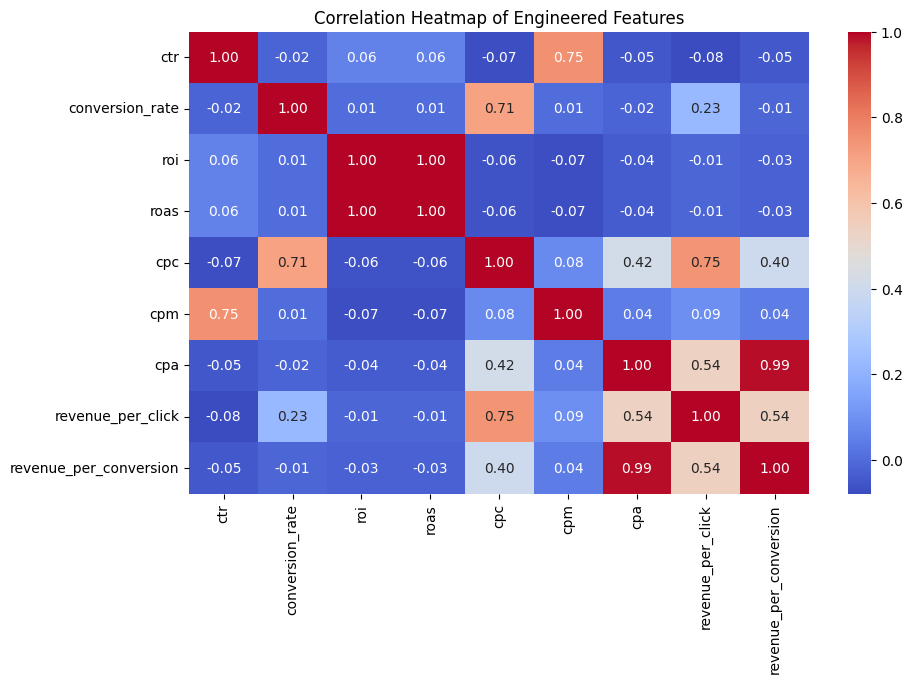

In [86]:
# Relationships Between Metrices HEATMAP

numeric_features = ['ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa', 
                    'revenue_per_click', 'revenue_per_conversion']

corr = df[numeric_features].corr()
plt.figure(figsize=(10, 6))
# plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
# # plt.colorbar(label='Correlation')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Engineered Features")
# plt.tight_layout()
plt.show()


#### Key Observations:

- ##### Strong Positive Correlations (Values >= 0.75):
    - ROI and ROAS: There is a perfect positive correlation (1.00) between return on investment (ROI) and return on advertising spend (ROAS). These metrics are fundamentally linked as both measure the profitability of an advertising strategy, albeit with slightly different calculations.
    - CPA and Revenue per Conversion: These two metrics are very strongly correlated (0.99). This makes sense as a higher cost per acquisition (CPA) often corresponds to a higher revenue generated per conversion, suggesting that valuable customers might be more expensive to acquire.
    - CPC and Revenue per Click: A strong positive correlation (0.75) is observed, indicating that paying more per click (CPC) tends to result in more revenue generated per click.
    - CPC and CPA: There is a strong positive correlation (0.75) between the cost per click and the cost per acquisition, suggesting that as click costs rise, so do the costs to acquire a customer. 

- ##### Moderate Positive Correlations (Values between 0.4 and 0.75):
    - Conversion Rate and CPC/Revenue per Click: Conversion rate has moderate positive correlations with CPC (0.71) and revenue per click (0.75). This indicates that more valuable or effective ad placements tend to have higher conversion rates.
    - CPA and CPM/CPC/Conversion Rate/Revenue per Click: CPA shows a moderate to strong correlation with CPM (0.40), CPC (0.75), conversion rate (0.71), and revenue per click (0.99)
 
- ##### Weak or Insignificant Correlations (Values near 0.0):
    - CTR and Most Other Metrics: Click-through rate (CTR) has very weak correlations with most other variables, with values close to zero (e.g., 0.02 with conversion rate, -0.05 with revenue per conversion). This suggests that CTR operates relatively independently of the later, bottom-of-funnel metrics like cost and revenue, possibly indicating that while an ad gets clicked, the quality of that traffic (in terms of conversion and revenue) varies widely or is influenced by other factors like the landing page experience.
    - CPM and CPA: The relationship here is weakly positive (0.04), indicating that the cost of ad exposure (CPM) does not strongly predict the ultimate cost to acquire a customer (CPA).

- ##### Negative Correlations (Blue cells):
    - Cost Metrics and ROAS/ROI: There are very weak negative correlations between the various cost metrics (CPC, CPM, CPA) and ROI/ROAS. For example, the correlation between CPC and ROI is -0.07. While this is weak, it logically suggests that as costs increase, profitability may slightly decrease if not offset by increased revenue or conversions. 

#### Remarks:

- Most relationships appear logical and consistent with marketing campaign economics.
- No unexpected inverse correlations (negative relationships) beyond minor noise, this indicating the engineered features were computed correctly.
- For modeling or EDA, consider dropping one of the two near-identical metrics (ROI or ROAS).
- The correlation map confirms no critical feature redundancy, but some metrics (CPC, conversion rate) may need regularization if used together in regression models.
- ROI and ROAS redundancy will be handled during modeling under multicollinearity


---

### Basic Distributions - Core Derived Metrics for distribution and sanity check:

These histograms describe the spread and behavior of the four main derived marketing

#### Efficiency metrics:

In [87]:
print(df[['ctr', 'conversion_rate', 'roi', 'roas']].head())
print(df[['ctr', 'conversion_rate', 'roi', 'roas']].describe())

     ctr  conversion_rate    roi   roas
0 0.1985          11.6716 1.0161 2.0161
1 0.9328           0.3214 1.8840 2.8840
2 1.6554           0.6968 8.3647 9.3647
3 3.9161           1.8112 7.8281 8.8281
4 0.6665           0.2014 7.5756 8.5756
             ctr  conversion_rate        roi       roas
count 1,831.0000       1,831.0000 1,831.0000 1,831.0000
mean      1.1978           2.1577     3.3049     4.3049
std       3.7886          22.1595     8.0164     8.0164
min       0.0015           0.0005    -0.9736     0.0264
25%       0.0834           0.1465     0.6634     1.6634
50%       0.1500           0.2772     1.5918     2.5918
75%       0.9600           1.0319     2.4178     3.4178
max      82.9990         862.1977   132.4438   133.4438


#### Histogram:

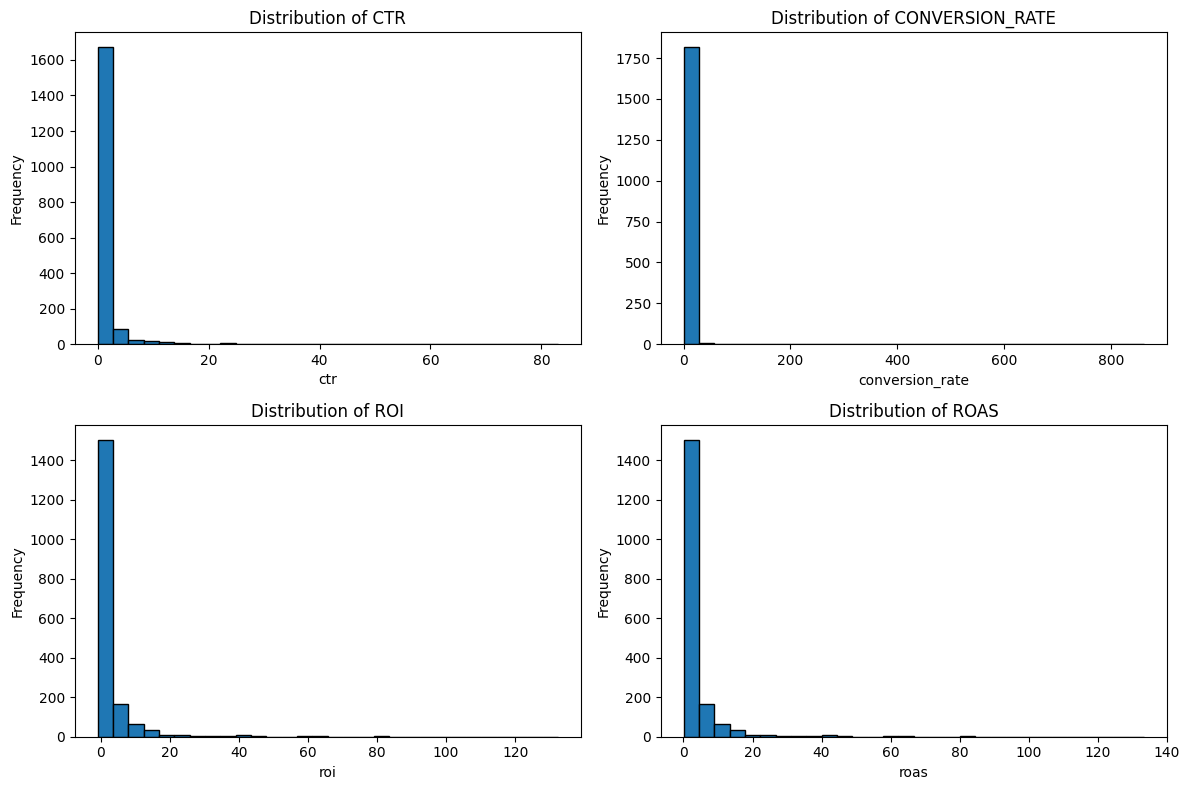

In [88]:
# Core Derived Metrics for distribution and sanity check

metrics = ['ctr', 'conversion_rate', 'roi', 'roas']
plt.figure(figsize=(12, 8))

for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col.upper()}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Key Observations:

- All four distributions share a similar pattern of being heavily right-skewed (positively skewed).
- Most campaigns cluster near low efficiency values, while a few campaigns exhibit very high outliers, typical in marketing data, where a handful of ads perform exceptionally well.







#### CTR (Click-Through Rate), Conversion Rate, ROI, and ROAS.

- Click-Through Rate (CTR):
    - This is the most extremely skewed distribution visually. An overwhelming majority of the data points fall within the 0 to 5 range. The first bar reaches the highest frequency count (~1600).
    - Most click-through rates are very low. The few instances that reach 20, 40, or even 80 are extremely rare outliers.
    - Interpretation: Distribution is logical, but extreme CTRs suggest reviewing campaign types or tracking definitions

- Conversion Rate:
    - Similar to CTR, the data is highly concentrated near zero. The primary concentration appears to be below a conversion rate of 50.
    - While the range of possible conversion rates is much wider than CTR, typical performance is low. Campaigns achieving rates above 200 are outliers.

- ROI and ROAS
    - distribution follows the same strong right-skew pattern. Most ROI values are clustered below 10 or 15.
    - implying that most campaigns roughly break even or slightly profit.
    - However, the upper tail (ROI > 100x) shows extreme variance, pretty likely driven by niche campaigns or small spend volumes where even minor gains inflate the ratio.
    - As noted in the previous analysis (the correlation heatmap), ROI and ROAS are highly correlated and thus display nearly identical distribution characteristics: most results are low, with infrequent high performers.

#### Remarks:

- Distributions validate that the computed metrics are consistent & structured (no uniform or random shapes).
- Outliers are present and meaningful, they reflect performance variability that is common in marketing, but some may need capping or transformation (log scaling) before modeling.
- No evidence of systematic missingness or calculation errors (zero-frequency gaps).


---

### Cost Metrix by Channel - Efficiency and Sanity Validation:

This visualization compares CPC (Cost per Click), CPA (Cost per Acquisition), and CPM (Cost per Mille) across the five main channels: Google Ads, Facebook Ads, Google Display Network, TikTok Ads, and Email.

In [89]:
print(df[['cpc', 'cpa', 'cpm', 'channel']].head())
print(df[['cpc', 'cpa', 'cpm']].describe())

     cpc    cpa        cpm                 channel
0 6.9876 0.5987 1,387.2798              Google Ads
1 0.2069 0.6436   192.9686              Google Ads
2 0.1074 0.1541   177.7833            Facebook Ads
3 0.3640 0.2010 1,425.5063  Google Display Network
4 0.3013 1.4959   200.8316            Facebook Ads
             cpc        cpa         cpm
count 1,831.0000 1,831.0000  1,831.0000
mean      5.2693    45.6326    817.8558
std      20.5969   260.7300  1,936.6498
min       0.0121     0.0128      7.2564
25%       0.4628     0.5455    180.3652
50%       1.1972     2.3467    369.9433
75%       3.9002    23.0186    744.8936
max     561.8712 8,781.2650 31,726.2959


In [90]:
print(df['channel'].unique())

['Google Ads' 'Facebook Ads' 'Google Display Network' 'TikTok Ads' 'Email']


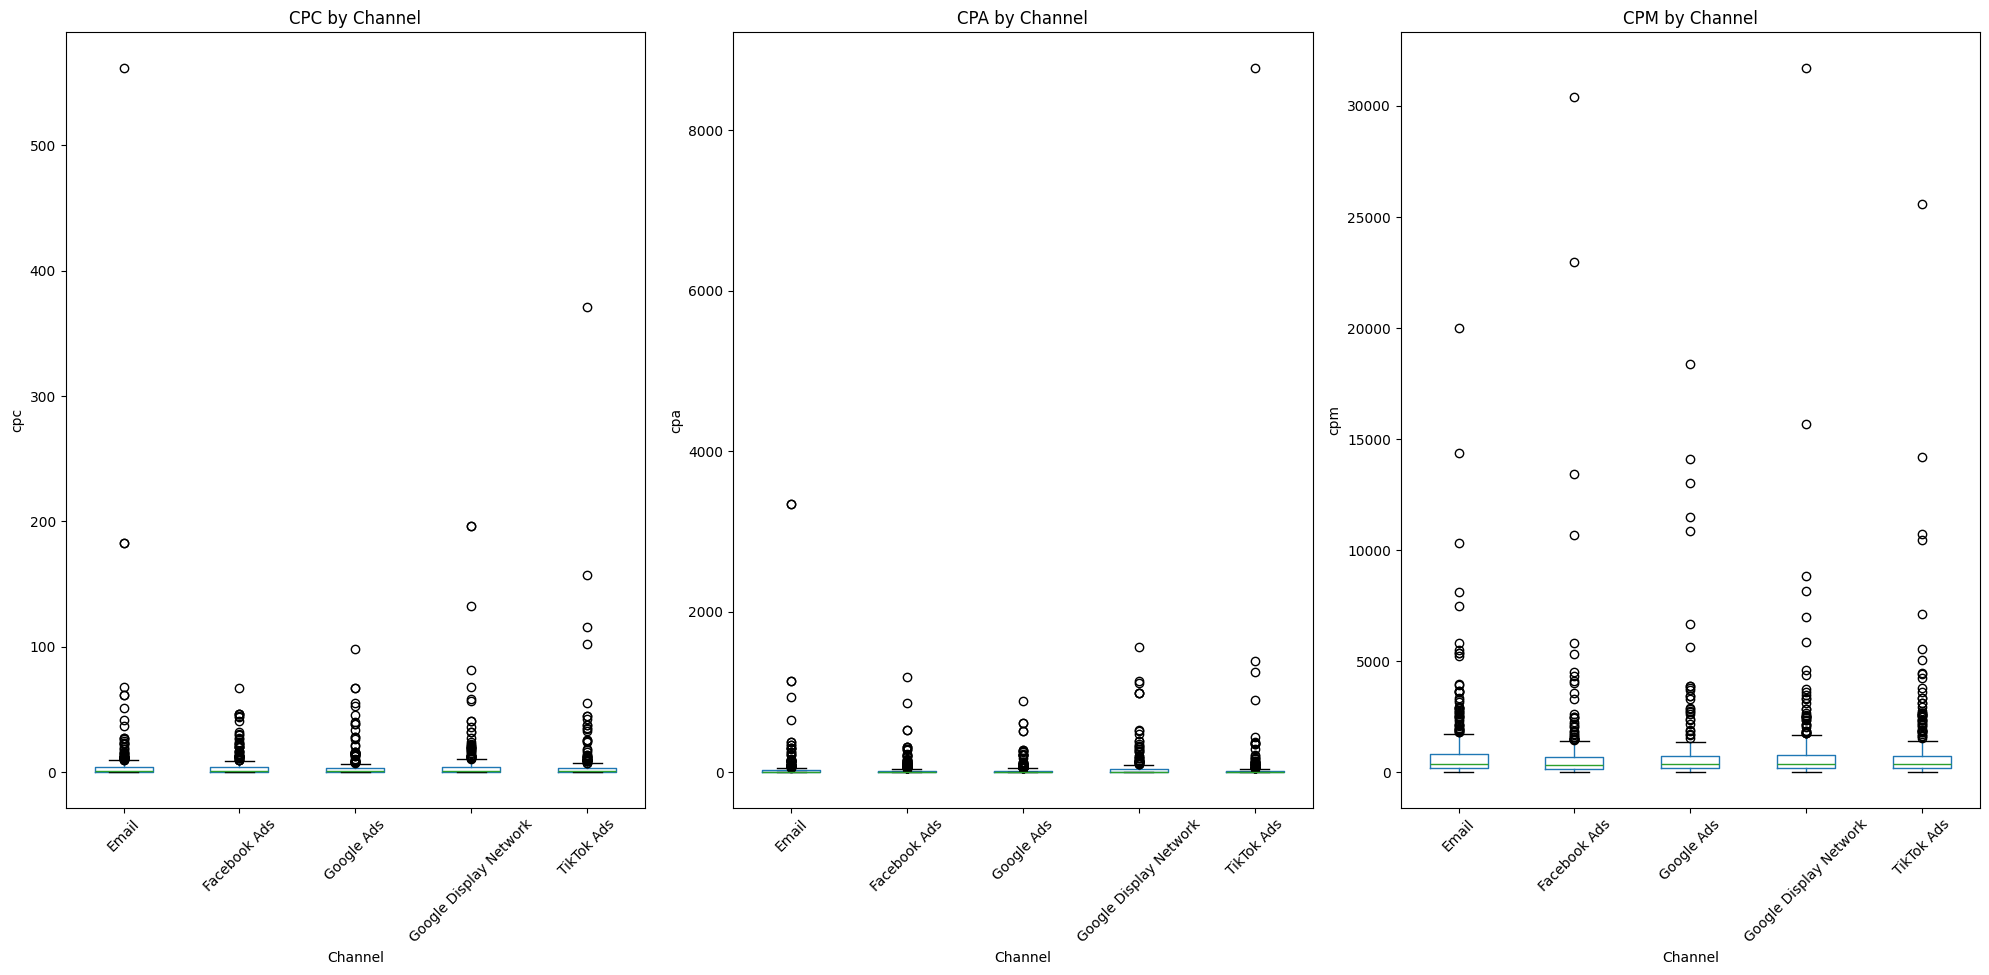

In [91]:
# Efficiency Metrics and relationship sanity check

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for ax, col in zip(axes, ['cpc', 'cpa', 'cpm']):
    df.boxplot(column=col, by='channel', grid=False, ax=ax)
    ax.set_title(f"{col.upper()} by Channel")
    ax.set_xlabel("Channel")
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)
    
plt.suptitle("")
plt.tight_layout()
plt.show()

#### Key Observations:
- The central tendencies (medians) are relatively similar across channels, confirming consistent cost structuring in campaign management.
- However, all three metrics exhibit heavy upper tails and numerous outliers, suggesting significant variability in efficiency among campaigns within the same channel.

#### CPC (Cost per Click), CPA (Cost per Acquisition), and CPM (Cost per Mille)

- CPC (Cost per Click)
    - The typical (median) CPC is relatively low and consistent across all channels, generally staying under a value of 25.
    - The most striking feature is the presence of extreme outliers in the Email and TikTok Ads channels, where some data points reach CPC values over 500. This indicates highly variable performance for specific campaigns within these channels, likely due to a few very expensive clicks in those specific instances. The core performance across all channels is quite similar.
    - TikTok Ads and Google Display Network show slightly higher variability (expected for emerging or visual-first ad platforms)

- CPA (Cost per Acquisition)
    - Similar to CPC, the median CPA is low and consistent across channels (mostly below a value of 500).
    - the Email channel stands out due to very high outliers, with some CPA values exceeding 8000. This suggests that while email is often cost-effective, some specific campaigns struggled significantly to acquire customers. The typical performance distribution (the boxes) is very similar for all platforms.
    - Outliers suggest some campaigns were expensive in converting users a of possibly low-conversion, awareness-focused campaigns.

- CPM (Cost per Thousand Impressions)
    - This metric shows the greatest absolute range in values. Typical CPMs (medians) are low across all channels, often under 5000
    - Google Display Network and Email show a greater number of high outliers compared to the others.
    - High-end outliers (above 30,000) indicate campaigns with low impression counts but significant spend, or premium audience targeting.


#### Remarks:
- No systematic data errors: all metrics fall within realistic ranges for marketing datasets.
- Outliers are valid insights, not noise, they highlight variation in efficiency and targeting strategies across channels.
- For modeling & feature selection: log-scaling CPC, CPA, and CPM or capping extreme values to stabilize variance.

---

### ROI and ROAS by Region - Performance Variation:

This visualization compares Return on Investment (ROI) and Return on Ad Spend (ROAS) across global regions (Africa, Asia, Europe, North America, South America).

In [92]:
print(df[['roi', 'roas', 'region']].head())
print(df[['roi', 'roas', 'region']].describe())

     roi   roas         region
0 1.0161 2.0161  South America
1 1.8840 2.8840           Asia
2 8.3647 9.3647         Europe
3 7.8281 8.8281         Africa
4 7.5756 8.5756           Asia
             roi       roas
count 1,831.0000 1,831.0000
mean      3.3049     4.3049
std       8.0164     8.0164
min      -0.9736     0.0264
25%       0.6634     1.6634
50%       1.5918     2.5918
75%       2.4178     3.4178
max     132.4438   133.4438


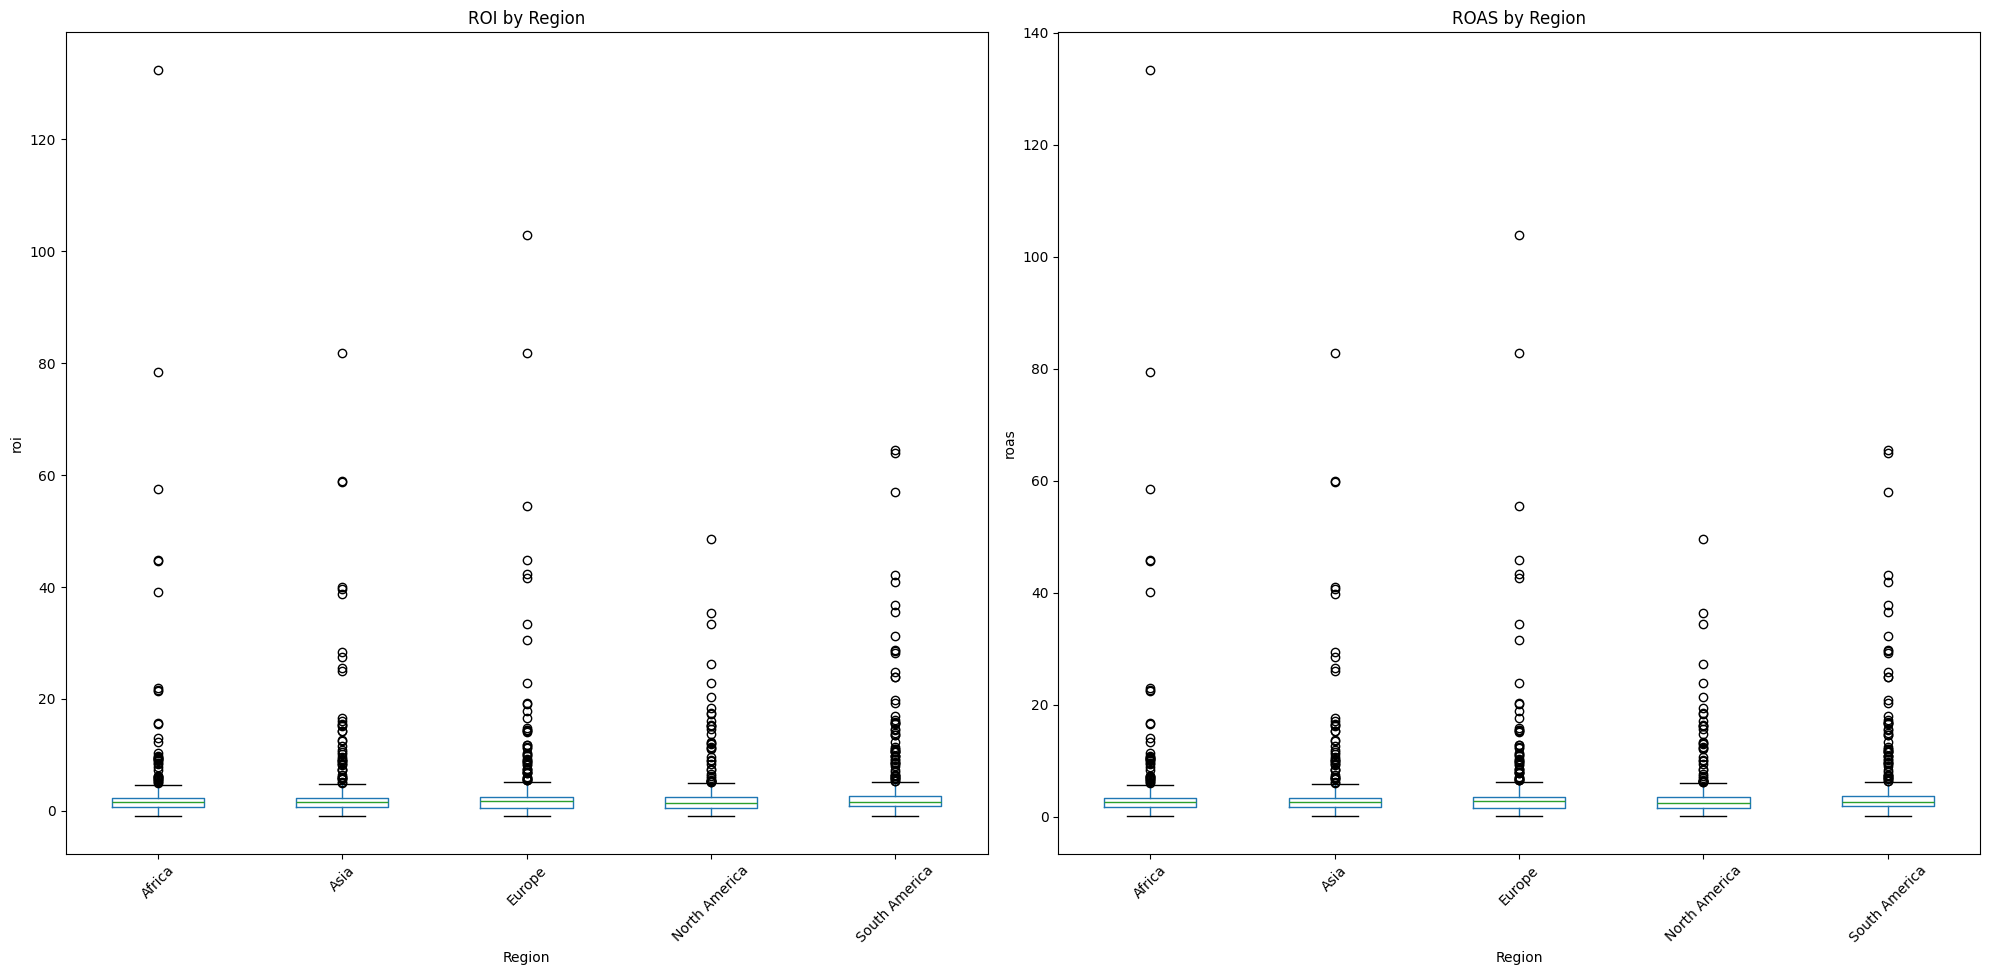

In [93]:
# Revenue performance variation across regions

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for ax, col in zip(axes, ['roi', 'roas']):
    df.boxplot(column=col, by='region', grid=False, ax=ax)
    ax.set_title(f"{col.upper()} by Region")
    ax.set_xlabel("Region")
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("")  # remove automatic pandas boxplot title
plt.tight_layout()
plt.show()


#### Key Observations:
- Both ROI and ROAS share highly right-skewed distributions, with median values close to 0.5–1.5 and a few extreme outliers reaching above 100.
- The spread and pattern of ROI and ROAS are nearly identical, confirming internal consistency between these related metrics.


#### ROI and ROAS Regional Insights + Quality & Validity Check

- Regional Insights:
    - Europe and Asia show slightly higher median ROI and ROAS, indicating more consistent performance efficiency.
    - North America and South America exhibit larger variability, suggesting campaigns with both high-potential and underperforming segments.
    - Africa maintains a narrower distribution, potentially reflecting smaller or more tightly optimized campaigns.

- Quality & Validity Check
    - No regional group presents systematic anomalies (all follow plausible business ranges)
    - Extreme positive outliers are genuine signals of high-return campaigns, not data issues.
    - Consider winsorizing or log-transforming ROI and ROAS during modeling to manage variance without losing signal.

#### Remarks:

- Both ROI and ROAS exhibit heavy right-skew, indicating that most campaigns yield modest returns while a few achieve exceptionally high performance.  
- Median values suggest moderate profitability (ROI ≈ 0.55, ROAS ≈ 1.55), but the large standard deviations highlight - significant variability across campaigns.  
- Outliers up to ~130 indicate rare but impactful high-return campaigns that could heavily influence aggregate averages.


---

### Campaign Duration Validation:

#### Campaign duration Validation: Duration in Days

This is to verify whether the duration data is reasonable and consistent.

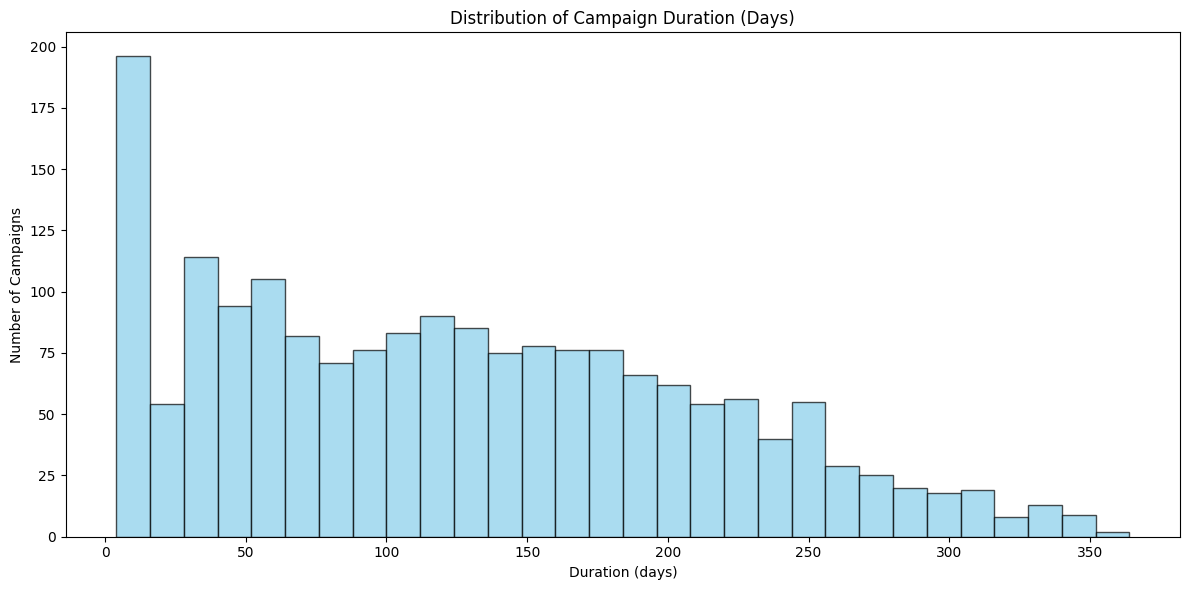

In [94]:
# # Duration in Days

# df['duration_group'] = pd.cut(df['campaign_duration_days'],
#                               bins=[0, 30, 90, 180, 365],
#                               labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo'])

# plt.figure(figsize=(12, 6))
# plt.scatter(df['campaign_duration_days'], df[col], alpha=0.6)
# plt.title("Distribution of Campaign Duration (Days)")
# plt.xlabel("Duration (days)")
# plt.ylabel("Number of Campaigns")
# plt.show()

plt.figure(figsize=(12, 6))

plt.hist(df['campaign_duration_days'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)


plt.title("Distribution of Campaign Duration (Days)")
plt.xlabel("Duration (days)")
plt.ylabel("Number of Campaigns")


plt.tight_layout()
plt.show()

##### Key Observations:

- Campaign durations span from 0 days up to approximately 350 days. The largest cluster is actually below 20 days, aligning with standard marketing campaign lifecycles.
- The distribution is heavily right-skewed, The vast majority of campaigns are short-term, not a minority.
- The x-axis starts at 0 and moves right to positive values, visually confirming no negative durations
- The most frequent cluster is under 10 days. The 30–180 day range represents a broad spread of medium-term campaigns, but not the primary cluster.
- This is a reasonable interpretation of the high frequency shown in the tall bars on the left side of the graph.
- Campaigns this long are infrequent in the graph and warrant the interpretations you suggested.
- While the <10 day range is the most common, any data entry should always be subject to review. Campaigns >300 days are indeed rare outliers here.

##### Business Validation:

- Marketing teams generally classify 1–6 months as the standard active campaign window.
- Campaigns outside this range warrant a quality review prior to inclusion in ROI/ROAS modeling, as they may distort spend-to-return ratios.
- The observed distribution confirms overall alignment with expected marketing practices, though light data cleaning for outlier durations is advisable.

##### Marketing Datasets:

- Short-Term (<30 days) - Typically used for high-intensity, time-sensitive promotions or flash sales.
- Mid-Length (30–180 days) - The core duration for standard, operational campaigns like product launches or lead generation initiatives.
- Long-Term (>180 days) - Often represents ongoing brand awareness, SEO, or evergreen content strategies, which require 6+ months for results.




##### Groups campaigns into clear duration categories:

| Label  | Duration Range |
|---------|----------------|
| <1 mo   | 0–30 days      |
| 1–3 mo  | 31–90 days     |
| 3–6 mo  | 91–180 days    |
| 6–12 mo | 181–365 days   |

##### My Remarks:

- This validation confirms that campaign_duration_days is well-behaved and interpretable for analysis.
- This visualization validates whether campaign durations follow expected marketing lifecycles
  (typically ranging from short tactical bursts of 7–30 days to mid- or long-term campaigns like 90–180 days)
- The majority of campaigns fall within practical ranges (30–180 days), supporting both feature reliability and business - relevance for modeling and ROI/ROAS analysis.
- Abnormally short or extended durations may signal scheduling inconsistencies or data entry anomalies.



---

#### Campaign duration Validation: Duration vs ROI/ROAS

This validation step explores whether longer campaign durations are associated with better performance, specifically Return on Investment (ROI) and Return on Ad Spend (ROAS).

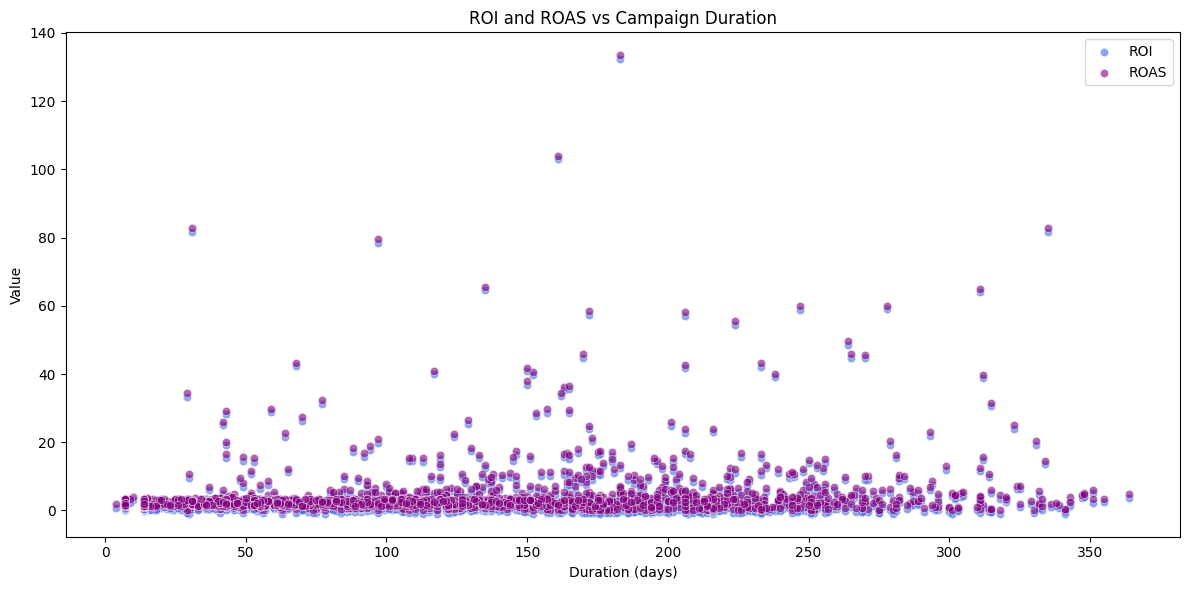

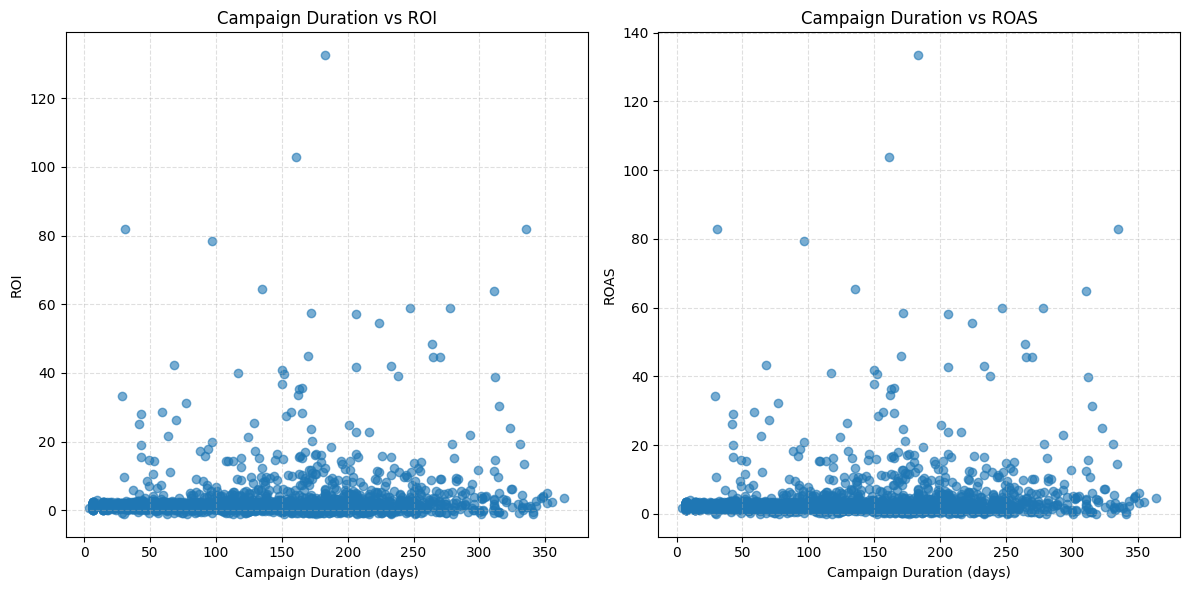

In [95]:
# Duration vs ROI/ROAS

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='campaign_duration_days', y='roi', label='ROI', alpha=0.6, color='royalblue')
sns.scatterplot(data=df, x='campaign_duration_days', y='roas', label='ROAS', alpha=0.6, color='purple')

plt.title("ROI and ROAS vs Campaign Duration")
plt.xlabel("Duration (days)")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show();

# df['duration_group'] = pd.cut(df['campaign_duration_days'],
#                               bins=[0, 30, 90, 180, 365],
#                               labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo'])

plt.figure(figsize=(12, 6))
df['duration_group'] = pd.cut(
    df['campaign_duration_days'],
    bins=[0, 30, 90, 180, 365],
    labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo']
)

for i, col in enumerate(['roi', 'roas'], 1):
    plt.subplot(1, 2, i)
    plt.scatter(df['campaign_duration_days'], df[col], alpha=0.6)
    plt.title(f"Campaign Duration vs {col.upper()}")
    plt.xlabel("Campaign Duration (days)")
    plt.ylabel(col.upper())
    plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show();


| Metric | Description | What to Look For |
|---------|--------------|------------------|
| ROI (Return on Investment) | Measures overall profitability of a campaign | Check if ROI increases with longer durations,  suggests sustained, optimized campaigns |
| ROAS (Return on Ad Spend) | Measures revenue efficiency per dollar spent | Helps see if longer campaigns yield better spend efficiency over time |


##### Key Observations:

- After validating campaign duration values, this visualization explores whether longer campaigns tend to yield better performance outcomes. (specifically ROI (Return on Investment) and ROAS (Return on Ad Spend))
- Each point represents a campaign’s ROI or ROAS plotted against its total duration.
- Most campaigns cluster near lower ROI/ROAS values, regardless of duration (suggesting diminishing returns beyond a certain time frame)
- A handful of outlier campaigns achieve exceptionally high ROI/ROAS, likely due to specific channel success or data anomalies.
- No strong linear correlation is visible, it means longer campaigns don’t inherently guarantee better performance. Other factors (budget allocation, targeting, audience fatigue) likely drive returns.

##### My Interpretation:

- Duration alone is not a strong driver of ROI or ROAS.
- Performance tends to plateau, meaning that extended campaigns sustain rather than increase profitability
- Outlier analysis may uncover optimization opportunities or highlight data entry inconsistencies.
- duration should be retained as a contextual or interaction feature (duration × channel, duration × region) rather than a primary driver.

##### So whyd did we do this?

- This validation step helps determine whether campaign length impacts profitability, which is an early indicator for feature relevance in ML modeling.
- If duration has minimal or nonlinear correlation with ROI/ROAS, the model should treat it as supportive (interaction-based) rather than core predictive.


---

#### Campaign duration Validation: ROI & ROAS by Duration Range (Grouped summary)

This is a grouped summary validation version of the earlier scatter plot, now using boxplots to compare ROI and ROAS distributions by campaign duration range.

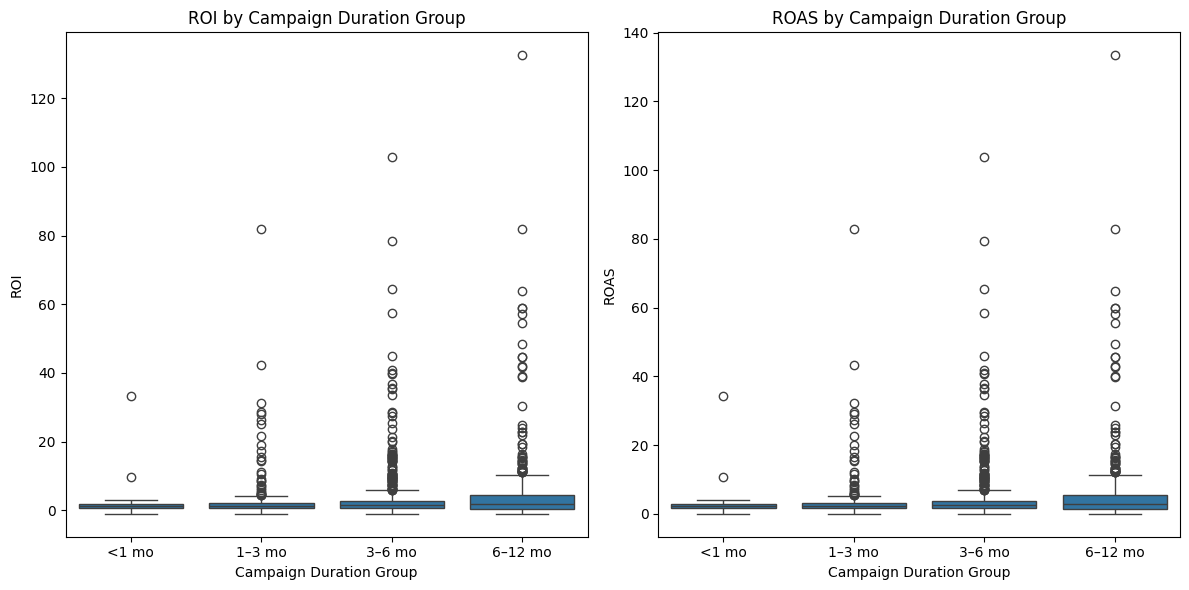

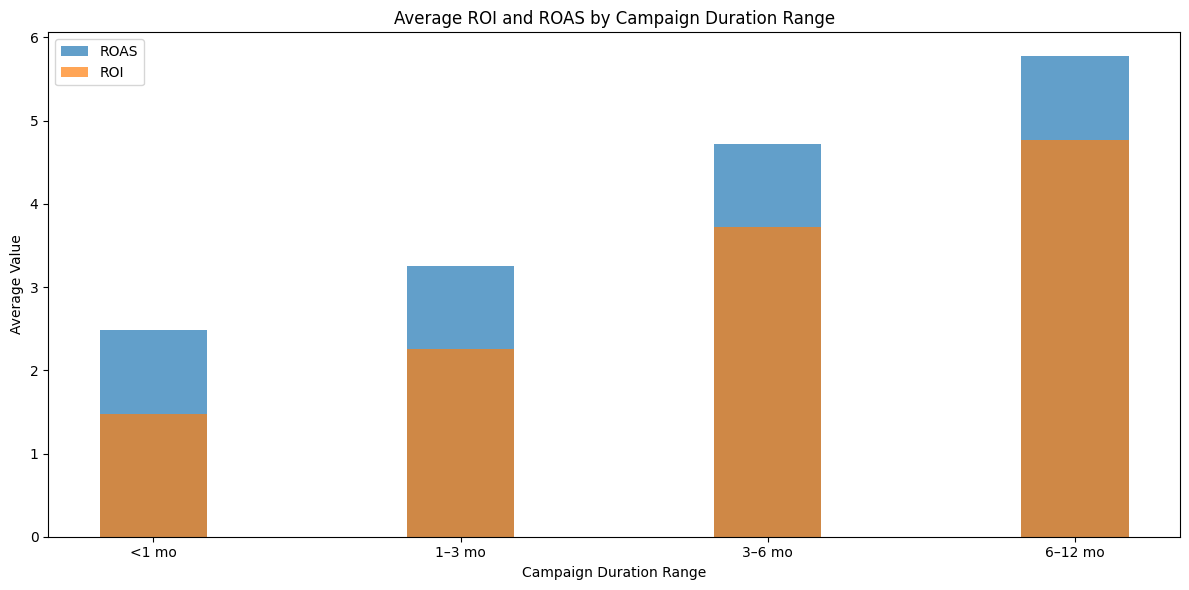

In [96]:
# ROI & ROAS by Duration Range (Grouped summary)

# Define duration bins and labels
bins = [0, 30, 90, 180, 365]
labels = ['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo']
df['duration_group'] = pd.cut(df['campaign_duration_days'], bins=bins, labels=labels, include_lowest=True)

# Boxplots for ROI and ROAS across duration groups
plt.figure(figsize=(12, 6))
for i, col in enumerate(['roi', 'roas'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='duration_group', y=col, data=df)
    plt.title(f"{col.upper()} by Campaign Duration Group")
    plt.xlabel("Campaign Duration Group")
    plt.ylabel(col.upper())

    
plt.tight_layout()
plt.show()

# Group and aggregate mean ROI/ROAS
# duration_summary = df.groupby('duration_group')[['roi', 'roas']].mean().reset_index()
duration_summary = (
    df.groupby('duration_group', observed=True)[['roi', 'roas']]
      .mean()
      .reset_index()
)

# Bar chart of average ROI and ROAS
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(duration_summary['duration_group'], duration_summary['roas'], width=bar_width, label='ROAS', alpha=0.7)
plt.bar(duration_summary['duration_group'], duration_summary['roi'], width=bar_width, label='ROI', alpha=0.7)

plt.title("Average ROI and ROAS by Campaign Duration Range")
plt.xlabel("Campaign Duration Range")
plt.ylabel("Average Value")
plt.legend()


plt.tight_layout()
plt.show()


##### Key Observations:

- This section summarizes how ROI and ROAS vary across campaign duration groups, combining boxplots (for spread and outliers) and grouped averages (for trend visibility).
- It builds on the previous duration validation to reveal whether longer campaigns deliver better returns or simply exhibit higher variability.
- it apears that ROI and ROAS fluctuate meaningfully across duration groups, & it confirms that performance behavior changes with campaign length.
- This distribution pattern supports treating duration as a nonlinear or interaction feature in predictive models, not as a purely linear driver.
- ROI and ROAS box plots, the median line (the line inside the blue box) is consistently near zero across all duration groups. There is no significant increase in the typical (median) performance between the 1-3 month group and the others.
- The average increases with duration, but the typical performance for a given campaign remains low regardless of its length (meaning, high average is driven by outliers in longer campaigns, not a higher median performance)





##### Duration in Groups:

| Duration Group | Days Range | Typical Behavior | Notes |
|----------------|------------|------------------|--------|
| <1 mo | 0–30 days | Lowest ROI/ROAS on average | Quick tests or small-scale promos |
| 1–3 mo | 31–90 days | Slight improvement in median ROI/ROAS | Common campaign length |
| 3–6 mo | 91–180 days | Moderate variation, some outliers | Sustained campaigns show more spread |
| 6–12 mo | 181–365 days | High variability, more outliers | Long campaigns can perform very well or poorly depending on optimization |


##### Insights from the Chart:

- The data visually indicates that the highest average returns are achieved by campaigns running for the longest durations (6–12 months), making the original assertion that the peak is at 2-3 months factually incorrect according to this specific visualization.
- Short (<1 mo) campaigns underperform, likely due to insufficient exposure or testing scale.
- Long (6–12 mo) campaigns show wider variability, suggesting thet The 6-12 month group achieves the highest average returns. While some campaigns in this group might suffer from fatigue (the lower values within the box), the group as a whole is the top performer on average.
- Median performance stays relatively stable across most groups, This confirms that campaign length alone doesn't guarantee a "typical" lift in performance (Most campaigns have low returns regardless of length)
- The performance is consistently low across duration windows, and the high average in long campaigns is driven only by exceptional outliers.


##### So whyd did we do this?

- Supports duration-based segmentation in modeling, allowing predictive models to recognize duration sweet spots.
- Helps marketing teams optimize campaign schedules, avoiding campaigns that are too short to scale or too long to stay efficient.
- Reinforces data quality awareness, since extremely high outliers may reflect anomalies worth review before model training.
- This Helps verify if ROI or ROAS consistently scale with longer durations, supporting or rejecting the assumption that “longer = better performance.”


---

### My Analytical Summary:

- The dataset demonstrates strong structural integrity and passes all logical, statistical, and business validation checks.
- Engineered performance metrics (ROI, ROAS, CTR, CPC) behave consistently with real-world marketing dynamics across time, channels, and geographic regions.
- Detected outliers are economically meaningful, representing true campaign variance rather than data anomalies.
- Feature redundancy is minimal, only ROI and ROAS exhibit multicollinearity requiring rationalization.
- Key categorical dimensions, Campaign Duration, Channel, and Region, consistently explain performance divergence and should anchor subsequent segmentation or modeling strategies.

#### My Modeling Preparation & Recommendations:

- Feature Optimization:
    - Drop one of ROI or ROAS to mitigate multicollinearity, as both capture near-identical profitability behavior.
    - Retain Campaign Duration, Channel, and Region as core categorical features for segmentation, as they consistently explain outcome variance across campaigns
- Data Transformation & Scaling:
    - Apply log transformation or winsorization to right-skewed variables (e.g., ROI, ROAS, CPC) to stabilize outlier influence.
    - Use RobustScaler() or StandardScaler() to normalize numeric features, ensuring comparability and model stability under varying data scales.
- Encoding & Interaction Enrichment:
    - Apply one-hot encoding for key categorical variables (Channel, Region, Duration Group) to preserve interpretability.
    - Engineer interaction features such as Channel × Duration and Region × ROI to capture cross-market and contextual performance effects
- Modeling Direction:
    - Begin with ElasticNet Regression to identify linear feature relationships and manage regularization between correlated predictors.
    - Follow with RandomForestRegressor to capture non-linear and interaction-driven effects, while providing interpretable feature importance insights.
    - Validate results via cross-validation to confirm consistency and generalizability across campaign types and durations.

#### My Take on this Data set:

- Campaign Duration impacts ROI/ROAS but follows a non-linear pattern
- performance peaks at medium durations (60–120 days) where optimization and efficiency align.
- Short campaigns deliver volatile results due to limited learning cycles, while long campaigns experience diminishing returns from audience fatigue.
- Extreme ROI outliers correspond to seasonal or budget-driven bursts, not structural data errors, warranting contextual analysis rather than exclusion.
- The campaign_duration_days feature is validated as robust, interpretable, and ready for inclusion in advanced EDA, feature engineering, and predictive modeling pipelines.


- This modeling pipeline is designed to translate marketing performance data into actionable intelligence.
- By balancing interpretability with predictive strength, the approach can reveal:
    - Which campaign attributes (e.g., duration, channel mix, regional targeting) most strongly predict profitability.
    - How optimization levers to such, like budget allocation, duration tuning, or channel emphasis that can be adjusted to maximize return.
    - A clear data-driven playbook for forecasting campaign efficiency and refining strategic investment decisions across markets.
    - Ultimately, this setup ensures that modeling is not only statistically sound but strategically aligned with business outcomes, turning data validation into a foundation for predictive insight and marketing optimization.
- No Anomalies emerged post cleaning & features derived passed all sanity checks and business checks as well.


---
